In [2]:
#let's import important libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import  LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
#Get the csv data and prnt the head
df=pd.read_csv('temperature.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [9]:
#Drop date
df=df.drop(['Date'],axis=1)
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [10]:
#Data SUMMARY
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


Null values present in some columns.          

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Present_Tmax      7682 non-null   float64
 2   Present_Tmin      7682 non-null   float64
 3   LDAPS_RHmin       7677 non-null   float64
 4   LDAPS_RHmax       7677 non-null   float64
 5   LDAPS_Tmax_lapse  7677 non-null   float64
 6   LDAPS_Tmin_lapse  7677 non-null   float64
 7   LDAPS_WS          7677 non-null   float64
 8   LDAPS_LH          7677 non-null   float64
 9   LDAPS_CC1         7677 non-null   float64
 10  LDAPS_CC2         7677 non-null   float64
 11  LDAPS_CC3         7677 non-null   float64
 12  LDAPS_CC4         7677 non-null   float64
 13  LDAPS_PPT1        7677 non-null   float64
 14  LDAPS_PPT2        7677 non-null   float64
 15  LDAPS_PPT3        7677 non-null   float64
 16  LDAPS_PPT4        7677 non-null   float64


In [12]:
#To count null values
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [14]:
#Filling null values
#Filling station
df['station']=df['station'].fillna(df['station'].mean())

#Filling Present_Tmax
df['Present_Tmax']=df['Present_Tmax'].fillna(df['Present_Tmax'].mean())

#Filling Present_Tmin
df['Present_Tmin']=df['Present_Tmin'].fillna(df['Present_Tmin'].mean())

#Filling LDAPS_RHmin
df['LDAPS_RHmin']=df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mean())

#Filling LDAPS_RHmax
df['LDAPS_RHmax']=df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].mean())

#Filling LDAPS_Tmax_lapse
df['LDAPS_Tmax_lapse']=df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mean())

#Filling LDAPS_RHmin_lapse
df['LDAPS_Tmin_lapse']=df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mean())

#Filling LDAPS_WS
df['LDAPS_WS']=df['LDAPS_WS'].fillna(df['LDAPS_WS'].mean())


#Filling LDAPS_LH
df['LDAPS_LH']=df['LDAPS_LH'].fillna(df['LDAPS_LH'].mean())

#Filling LDAPS_CC1
df['LDAPS_CC1']=df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mean())


#Filling LDAPS_CC2
df['LDAPS_CC2']=df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mean())

#Filling LDAPS_CC3
df['LDAPS_CC3']=df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].mean())

#Filling LDAPS_CC4
df['LDAPS_CC4']=df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].mean())


#Filling LDAPS_PPT1
df['LDAPS_PPT1']=df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mean())


#Filling LDAPS_PPT2
df['LDAPS_PPT2']=df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mean())

#Filling LDAPS_PPT3
df['LDAPS_PPT3']=df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mean())

#Filling LDAPS_PPT4
df['LDAPS_PPT4']=df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mean())


#Filling Next_Tmax
df['Next_Tmax']=df['Next_Tmax'].fillna(df['Next_Tmax'].mean())

#Filling Next_Tmin
df['Next_Tmin']=df['Next_Tmin'].fillna(df['Next_Tmin'].mean())


In [15]:
#To re-count null values
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

.Now no null value present .              

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

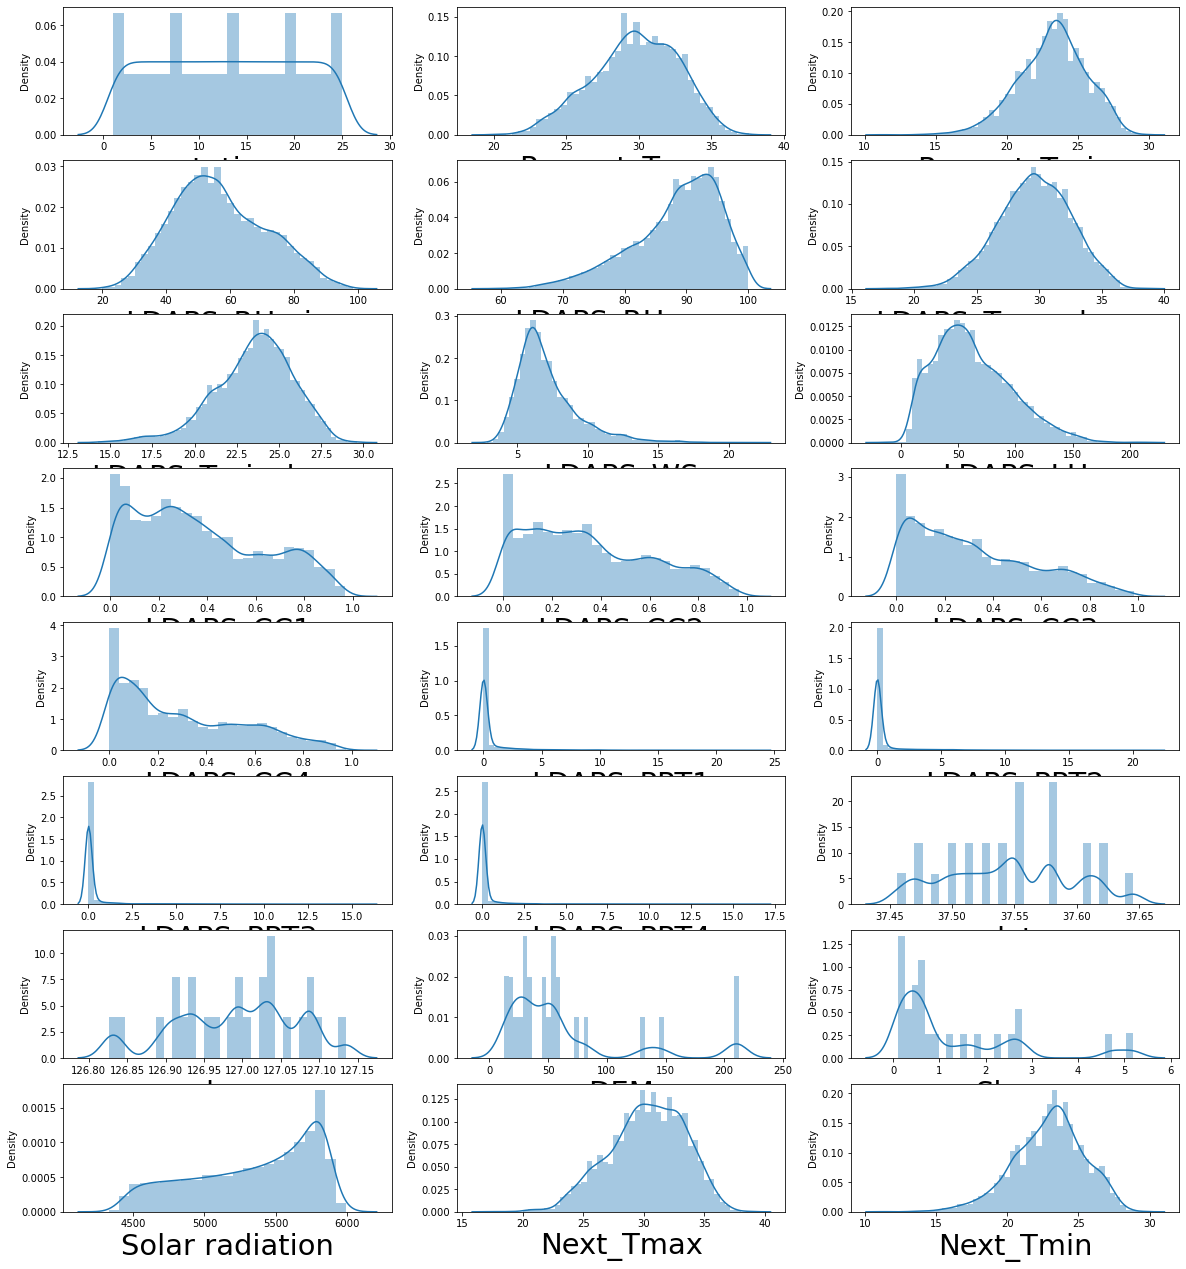

In [16]:
#Let's check skewness
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=27:
        ax=plt.subplot(9,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=29)
    plotnumber+=1
plt.show()    

.Skewness is present .but first going to get accuract with skewness.        

In [17]:
#split the data
x=df.drop(columns=['Next_Tmax','Next_Tmin'],axis=1)
y=df.drop(x,axis=1)

In [19]:
#data scaling
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [20]:
#spliting the data in train and test
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=300)

In [21]:
#Model instantiating and trainning
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [23]:
#saving the model
filename='finalized_model.pickle'
pickle.dump(regression,open(filename,'wb'))

In [24]:
#Adjusted R2 score
regression.score(x_train,y_train)

0.7994588236846285

In [25]:
regression.score(x_test,y_test)

0.7968952543189017

.Model is 79 % fit to the data.                

In [26]:
#Model Evalution
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [27]:
y_pred=regression.predict(x_test)

In [28]:
mean_absolute_error(y_test,y_pred)

0.9581978235896325

In [29]:
mean_squared_error(y_test,y_pred)

1.626951736230699

In [38]:
#IMPORTING LAASOCV
from sklearn.linear_model import Ridge,MultiTaskLasso,RidgeCV,MultiTaskLassoCV

In [35]:
#LASSOCV
lasscv=MultiTaskLassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

MultiTaskLassoCV(normalize=True)

In [36]:
#best parameter
alpha=lasscv.alpha_
alpha

3.902051764414576e-05

In [39]:
#Now using this
lasso_reg=MultiTaskLasso(alpha)
lasso_reg.fit(x_train,y_train)

MultiTaskLasso(alpha=3.902051764414576e-05)

In [40]:
lasso_reg.score(x_test,y_test)

0.7968983910458116